In [208]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [188]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [189]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [190]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [191]:
# company["Sales"] = pd.cut(company["Sales"], bins =[0,8,17],labels =["Risky","Good"])
result = []
for value in company["Sales"]:
    if value <= 8:
        result.append("No")
    else:
        result.append("Yes")
       
company["Sales"] = result   
print(company)

    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     Yes        138      73           11         276    120       Bad   42   
1     Yes        111      48           16         260     83      Good   65   
2     Yes        113      35           10         269     80    Medium   59   
3      No        117     100            4         466     97    Medium   55   
4      No        141      64            3         340    128       Bad   38   
..    ...        ...     ...          ...         ...    ...       ...  ...   
395   Yes        138     108           17         203    128      Good   33   
396    No        139      23            3          37    120    Medium   55   
397    No        162      26           12         368    159    Medium   40   
398    No        100      79            7         284     95       Bad   50   
399   Yes        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Y

In [192]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,Yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,No,117,100,4,466,97,Medium,55,14,Yes,Yes
4,No,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,No,139,23,3,37,120,Medium,55,11,No,Yes
397,No,162,26,12,368,159,Medium,40,18,Yes,Yes
398,No,100,79,7,284,95,Bad,50,12,Yes,Yes


In [193]:
company.Sales.value_counts()

No     236
Yes    164
Name: Sales, dtype: int64

In [194]:
company.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [195]:
# labelencoder = LabelEncoder()    
company['Sales'] = labelencoder.fit_transform(company["Sales"])
company['ShelveLoc'] = labelencoder.fit_transform(company["ShelveLoc"])
company['Urban'] = labelencoder.fit_transform(company["Urban"])
company['US'] = labelencoder.fit_transform(company["US"])
labelencoder = LabelEncoder()


In [196]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [197]:
company.Sales.value_counts()

0    236
1    164
Name: Sales, dtype: int64

In [201]:
sales = company.iloc[:,0:1]
company_data = company.iloc[:,1:]


In [219]:
x = company_data
y = sales

In [225]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [220]:
x_train, x_test, y_train,y_test = train_test_split(x , y, test_size=0.5,random_state=80)

In [222]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

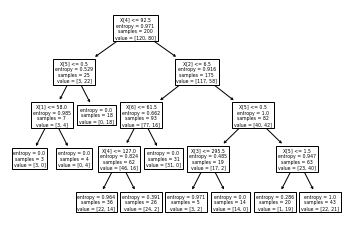

In [223]:
tree.plot_tree(model);

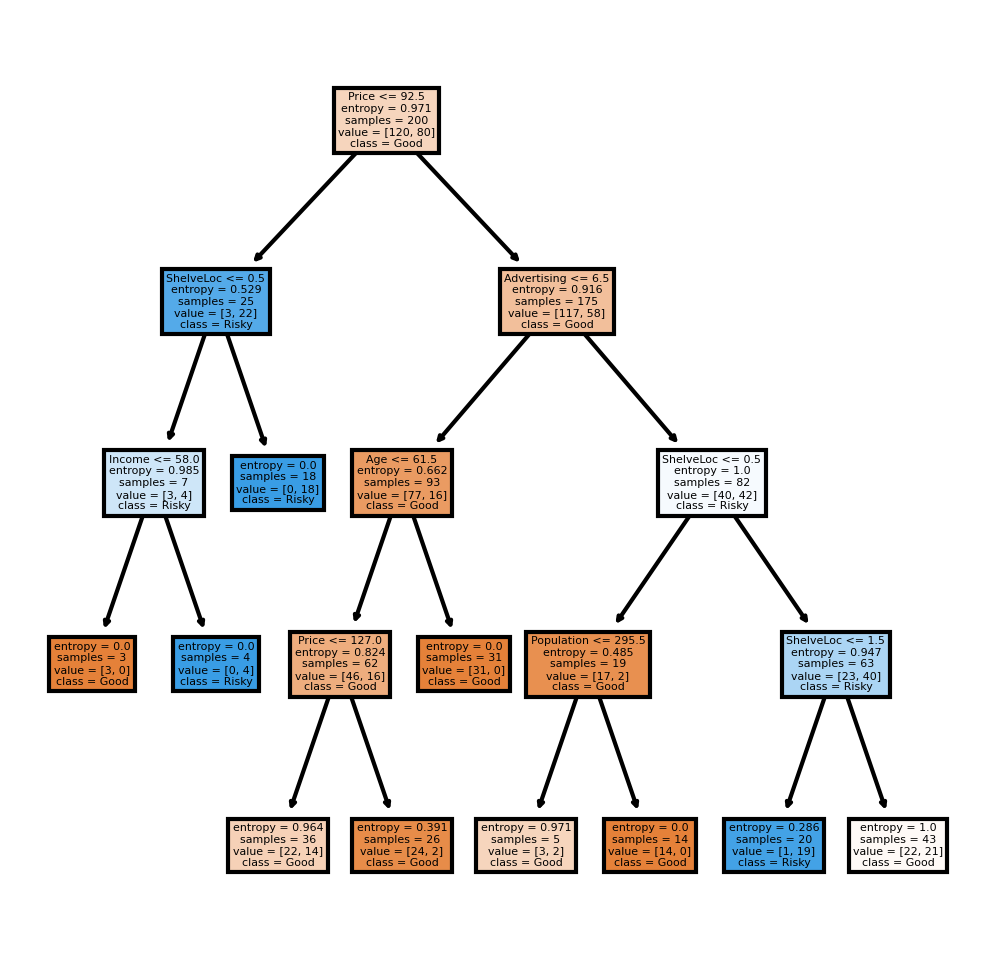

In [226]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [227]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    148
1     52
dtype: int64